In [1]:
!pip install diffusers transformers gradio accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.

In [14]:
from diffusers import StableDiffusionPipeline , StableDiffusionXLPipeline
import torch
import matplotlib.pyplot as plt


In [3]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchvision


In [9]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"




model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'USE_SAFETENSORS': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [15]:
pipe = StableDiffusionXLPipeline.from_pretrained(model_id2, torch_dtype=torch.float16, USE_SAFETENSORS=True)
pipe = pipe.to("cuda")

Keyword arguments {'USE_SAFETENSORS': True} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
prompt = "a blonde american girl sitting in throne like a chair , accompanied by tiger and lion on either side of chair, cinematic, dreamy , realistic, highbokh, forest theme"
image = pipe(prompt)["images"][0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: a blonde american girl sitting in throne like a chair , accompanied by tiger and lion on either side of chair, cinematic, dreamy , realistic, highbokh, forest theme


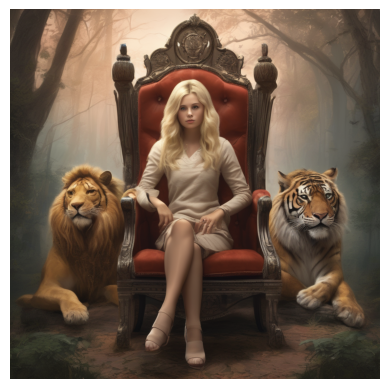

In [17]:
print('[PROMPT]:', prompt)
plt.imshow(image)
plt.axis('off')
plt.show()

**Parameter Tuning**



*   Negative prompting
*   Num_Interface_Steps
*   Height
*   weight
*   Num_Images_per_prompt







In [18]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images
  num_images = len(img)
  if num_images > 1:
    fig, ax = plt.subplots(nrows= 1, ncols=num_images)
    for i in range (num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');
  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
    plt.tight_layout()


In [21]:
prompt = "a beautiful blonde woman sitting in throne like a chair , accompanied by a tiger and lion on either side of chair, cinematic, dreamy , realistic, highbokh, forest theme"
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

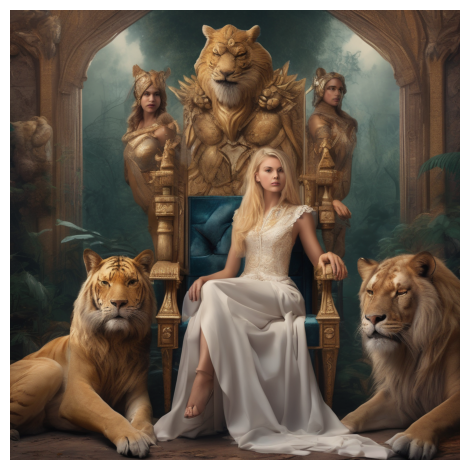

In [22]:
generate_image(pipe, prompt, params)

  0%|          | 0/200 [00:00<?, ?it/s]

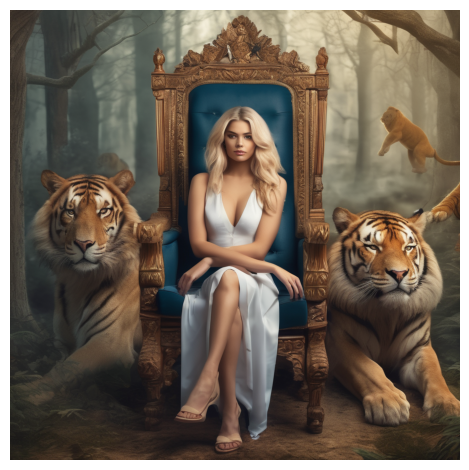

In [23]:
#num infersance steps
params = {"num_inference_steps": 200}
generate_image(pipe, prompt, params)

  0%|          | 0/200 [00:00<?, ?it/s]

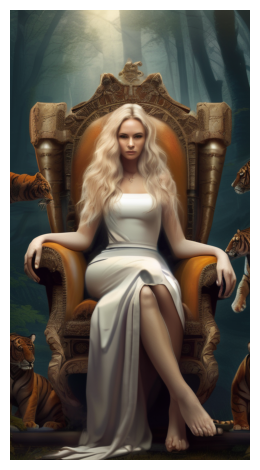

In [24]:
#height and width
params = {"num_inference_steps": 200, "height": int(1.5*640), "width": 512}
generate_image(pipe, prompt, params)

In [ ]:
#num images
params = {"num_inference_steps": 150, "height": int(1.5*640), "width": 512, "num_images_per_prompt": 2}
generate_image(pipe, prompt, params)

In [27]:
#negative prompt
params = {"num_inference_steps": 150, "height": int(1.5*640), "width": 512, "num_images_per_prompt": 1, "negative_prompt": 'low quaility,distorted'}
generate_image(pipe, prompt, params)

  0%|          | 0/150 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 480.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 367.06 MiB is free. Process 23398 has 14.39 GiB memory in use. Of the allocated memory 13.24 GiB is allocated by PyTorch, and 1.01 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)